# Widzenie maszynowe
## Laboratorium 3 - Image skeletonization
*Autor: Paweł Mendroch* - [Github](https://github.com/FrozenTear7/computer-vision-lab/tree/master/lab3)

Wykorzystując kod ze strony z [tutorialem](https://scikit-image.org/docs/dev/auto_examples/edges/plot_skeleton.html), generuję szkielety dwoma metodami dla każdego obrazu z folderu `input`.

Kod uruchomieniowy jest zawarty w `run.sh`, iteruję po tablicy ścieżek do plików do przetworzenia, które zapisywane są w folderze `output`.

Poniżej przedstawię przykładowe uruchomienie dla jednego obrazu.

Załadowanie potrzebnych bibliotek i odczyt obrazu przy pomocy biblioteki skimage jako bool z konwersją rgba do rgb, a następnie na odcienie szarości.

In [13]:
import sys
from skimage.morphology import skeletonize, thin
from skimage.transform import probabilistic_hough_line
from skimage.util import invert
from skimage import data, img_as_bool, io, color
import matplotlib.pyplot as plt

imgPath = "img_0015_mask_Unet_toe.png"

image = img_as_bool(
    color.rgb2gray(color.rgba2rgb(io.imread("./input/" + imgPath)))
)

Poniżej generuję szkielet obrazu na trzy sposoby - klasyczny oraz metodą Lee, a także wersję thinned, która powinna dać lepsze wyniki po usunięciu zbędnych odnóg.

Kąt palucha będę wykrywał na wygenerowanych obrazach metodą probabilistycznego wykrywania linii Hough. 
Podane poniżej parametry dają dobre wyniki dla wybranego obrazu, lecz dla wszystkich obrazów z `input` nie udało mi się znaleźć jednego idealnego ustawienia uruchomieniowego.

Dla prostoty przeglądu kodu i ścisłości używam końcowo wszędzie poniższych parametrów, co w niektórych obrazach da gorsze wyniki co widać we wnioskach na końcu sprawozdania.

In [15]:
skeleton = skeletonize(image)
skeleton_lee = skeletonize(image, method="lee")
thinned = thin(image)

threshold = 15
line_length = 130
line_gap = 50

angle = probabilistic_hough_line(
    skeleton, threshold=threshold, line_length=line_length, line_gap=line_gap
)
angle_lee = probabilistic_hough_line(
    skeleton_lee, threshold=threshold, line_length=line_length, line_gap=line_gap
)
angle_thinned = probabilistic_hough_line(
    thinned, threshold=threshold, line_length=line_length, line_gap=line_gap
)

Po wygenerowaniu potrzebnych obrazów przystępuję do konstrukcji wykresów wynikowych, w postaci 4 wykresów:
- oryginalnego obrazu
- klasycznego szkieletu z wykrytym kątem
- szkieletem w wersji Lee z wykrytym kątem
- wersja thinned z wykrytym kątem

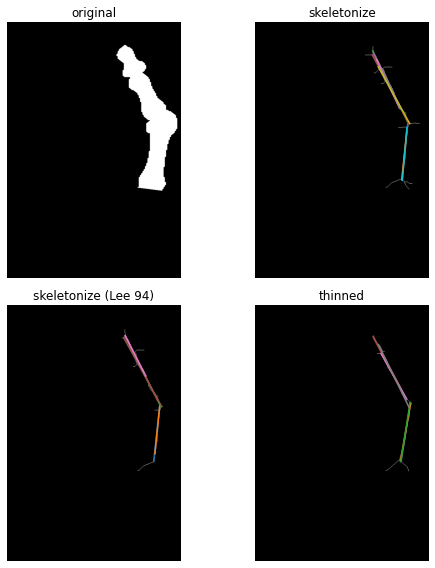

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title("original")
ax[0].axis("off")

ax[1].imshow(skeleton, cmap=plt.cm.gray)
for line in angle:
    p0, p1 = line
    ax[1].plot((p0[0], p1[0]), (p0[1], p1[1]))
ax[1].set_title("skeletonize")
ax[1].axis("off")

ax[2].imshow(skeleton_lee, cmap=plt.cm.gray)
for line in angle_lee:
    p0, p1 = line
    ax[2].plot((p0[0], p1[0]), (p0[1], p1[1]))
ax[2].set_title("skeletonize (Lee 94)")
ax[2].axis("off")

ax[3].imshow(thinned, cmap=plt.cm.gray)
for line in angle_thinned:
    p0, p1 = line
    ax[3].plot((p0[0], p1[0]), (p0[1], p1[1]))
ax[3].set_title("thinned")
ax[3].axis("off")

fig.tight_layout()
plt.show()

Jak widać na powyższych wykresach kąt został wykryty praktycznie idealnie, występuje powtórzenie wykrytych linii w metodzie klasycznej, lecz w wersji Lee są one praktycznie zbieżne.

Poniżej przestawiam wyniki dla wszystkich obrazów z `input`, niestety wybrane parametry nie pozwoliły na idealne wykrycie kąta w każdym przypadku, zwłaszcza im mniejszy kąt tym ciężej poprawnie go przedstawić, gdyż zmienia się długość linii i odległości pikseli, które powinniśmy brać pod uwagę.

Możliwe, że przykładowo biblioteka OpenCV dałaby lepsze wyniki, lecz postanowiłem trzymać się używanej w tutorialu biblioteki, która również dostarcza taką funkcjonalność.

![Img0006](./output/img_0006_mask_Unet_toe.png "Img0006")
![Img0006](./angles/img_0006_mask_Unet_toe.png "Img0006")

![Img0007](./output/img_0007_mask_Unet_toe.png "Img0007")
![Img0007](./angles/img_0007_mask_Unet_toe.png "Img0007")

![Img0009](./output/img_0009_mask_Unet_toe.png "Img0009")
![Img0009](./angles/img_0009_mask_Unet_toe.png "Img0009")

![Img0010](./output/img_0010_mask_Unet_toe.png "Img0010")
![Img0010](./angles/img_0010_mask_Unet_toe.png "Img0010")

![Img0012](./output/img_0012_mask_Unet_toe.png "Img0012")
![Img0012](./angles/img_0012_mask_Unet_toe.png "Img0012")

![Img0015](./output/img_0015_mask_Unet_toe.png "Img0015")
![Img0015](./angles/img_0015_mask_Unet_toe.png "Img0015")

![Img0016](./output/img_0016_mask_Unet_toe.png "Img0016")
![Img0016](./angles/img_0016_mask_Unet_toe.png "Img0016")

![Img0020](./output/img_0020_mask_Unet_toe.png "Img0020")
![Img0020](./angles/img_0020_mask_Unet_toe.png "Img0020")

![Img0021](./output/img_0021_mask_Unet_toe.png "Img0021")

![Img0027](./output/img_0027_mask_Unet_toe.png "Img0027")
![Img0027](./angles/img_0027_mask_Unet_toe.png "Img0027")


Jak widać na powyższych obrazach wyniki są dość mieszane. Niektóre kąty udało się wykryć bardzo dobrze, śmiem twierdzić że lepiej niż na przykładach z `angles`, a niektóre przypadki wykrywały kilka podobnych linii w tym samym miejscu. Z pewnością najlepszym rozwiązaniem byłoby przygotowanie masowych testów dla różnych wartości każdego z trzech parametrów `threshold`, `length` oraz `gap` i potem sprawdzić / porównać jakościowo z przykładami z `angels` co jednak jest ciężko wykonalne w naszym wymiarze czasowym.

Z pewnością kluczowym parametrem jest tutaj `length`, które pozwala nam odrzucić linie powstające z powodu 'rozgałęzień' szkieletu i pozostawić tylko długie linie związane z faktycznym kątem. Dobra wartość to moim zdaniem około 120-150, a zostałem na 130, które pozwoliło wykryć obie linie dla każdego obrazu dla chociaż jednej metody.

Następnie pozostaje dobrze połączyć `threshold` z `gap`, które są ze sobą dość powiązane, próbowałem różnych wartości i pozostałe w notebooku to moim zdaniem najlepsze ogólne ustawienia dla całego zestawu.

Mimo wszystko można stwierdzić na podstawie powyższych wyników, że wersja `thinned` daje przeciętnie najlepsze wyniki poza wyjątkami.

Kod użyty do generacji obrazów jest zawarty w pliku `lab3.py`, a skrypt uruchamiający całość w `run.sh`.